In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
md=pd.read_csv("./Dataset/cities_r2.csv")
md

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Vizianagaram,28,ANDHRA PRADESH,12,227533,111596,115937,20487,10495,9992,...,80306,1039,952,81.85,88.18,75.80,"18.1066576,83.3955506",30656,19173,11483
489,Warangal,28,ANDHRA PRADESH,9,620116,310400,309716,55392,28434,26958,...,217136,998,948,84.16,91.54,76.79,"17.9689008,79.5940544",109613,69507,40106
490,Wardha,27,MAHARASHTRA,8,105543,53241,52302,9754,5139,4615,...,43339,982,898,94.05,97.19,90.88,"20.745319,78.6021946",19363,10645,8718
491,Yamunanagar,6,HARYANA,3,216628,115404,101224,22905,12556,10349,...,74255,877,824,85.91,89.61,81.71,"30.1290485,77.2673901",29803,14349,15454


In [3]:
le=preprocessing.LabelEncoder()
md['state_name']=le.fit_transform(md['state_name'])
md['name_of_city']=le.fit_transform(md['name_of_city'])
md['location']=le.fit_transform(md['total_graduates'])
md

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,0,3,22,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,136,16287,8612,7675
1,1,27,14,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,25,8863,5269,3594
2,2,28,1,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,45,10565,6797,3768
3,3,20,10,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,186,19225,12189,7036
4,4,28,1,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,65,11902,7871,4031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,487,28,1,12,227533,111596,115937,20487,10495,9992,...,80306,1039,952,81.85,88.18,75.80,299,30656,19173,11483
489,488,28,1,9,620116,310400,309716,55392,28434,26958,...,217136,998,948,84.16,91.54,76.79,427,109613,69507,40106
490,489,27,14,8,105543,53241,52302,9754,5139,4615,...,43339,982,898,94.05,97.19,90.88,187,19363,10645,8718
491,490,6,7,3,216628,115404,101224,22905,12556,10349,...,74255,877,824,85.91,89.61,81.71,291,29803,14349,15454


In [4]:
cluster=[]
for k in range (1,11):
    kmean=KMeans(n_clusters=k).fit(md)
    cluster.append(kmean.inertia_)
cluster

[1321369933979516.0,
 377703319065242.6,
 190534936927761.0,
 95092791256678.48,
 61728384035919.83,
 41644551526020.2,
 27918020694083.426,
 19709972632711.723,
 14931498119480.832,
 11090748442093.914]

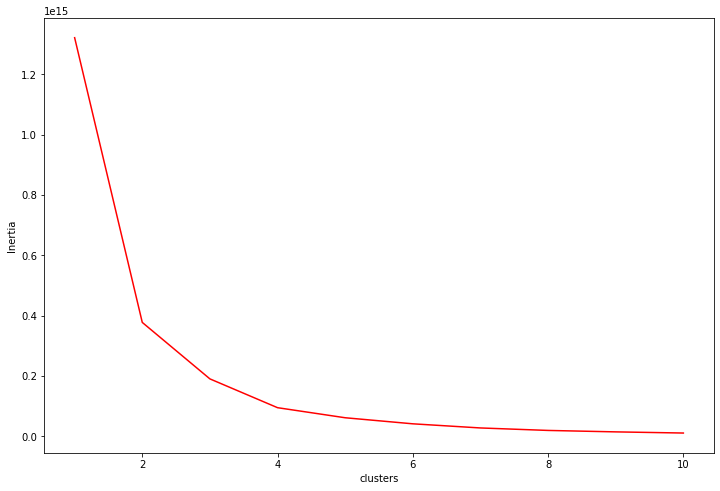

In [5]:
plt.figure(figsize=(12,8))
plt.plot(range(1,11),cluster,'-r')
plt.xlabel("clusters")
plt.ylabel("Inertia")
plt.show()

In [6]:
km=KMeans(n_clusters=4).fit(md)
md["labels"]=km.labels_
md

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates,labels
0,0,3,22,9,145238,76840,68398,15870,8587,7283,...,890,848,79.86,85.49,73.59,136,16287,8612,7675,0
1,1,27,14,7,112293,58256,54037,11810,6186,5624,...,928,909,91.99,94.77,89.00,25,8863,5269,3594,0
2,2,28,1,1,117388,59232,58156,13103,6731,6372,...,982,947,80.51,88.18,72.73,45,10565,6797,3768,0
3,3,20,10,24,173988,91495,82493,23042,12063,10979,...,902,910,83.46,89.98,76.23,186,19225,12189,7036,0
4,4,28,1,21,166537,82743,83794,18406,9355,9051,...,1013,968,68.38,76.58,60.33,65,11902,7871,4031,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,487,28,1,12,227533,111596,115937,20487,10495,9992,...,1039,952,81.85,88.18,75.80,299,30656,19173,11483,0
489,488,28,1,9,620116,310400,309716,55392,28434,26958,...,998,948,84.16,91.54,76.79,427,109613,69507,40106,0
490,489,27,14,8,105543,53241,52302,9754,5139,4615,...,982,898,94.05,97.19,90.88,187,19363,10645,8718,0
491,490,6,7,3,216628,115404,101224,22905,12556,10349,...,877,824,85.91,89.61,81.71,291,29803,14349,15454,0


C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


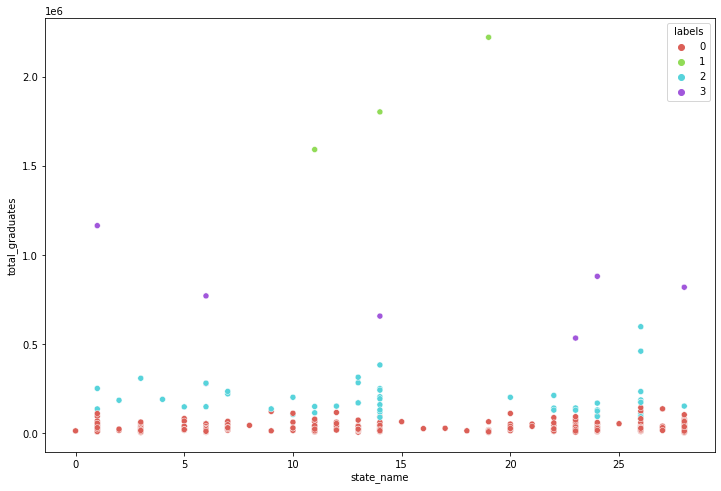

In [7]:
plt.figure(figsize=(12,8))
sns.scatterplot(md['state_name'],md['total_graduates'],hue=md['labels'],palette=sns.color_palette('hls',4))
plt.show()